# De bai tap kiem tra
```
Cho data set chứa thông tin về các cuốn sách được lưu trong file books.csv gồm
các thông tin: "ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";
"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L".
Hãy thực hiện các yêu cầu sau bằng RDD của Spark:
1 (1 điểm) Nạp file dữ liệu vào RDD.
2 (1 điểm) Cho biết số cuốn sách có trong data set.
3 (1 điểm) Cho biết có bao nhiêu cuốn sách xuất bản trong mỗi năm.
4 (1 điểm) Vẽ biểu đồ cột biểu diễn số lượng sách xuất bản mỗi năm.
5 (1 điểm) Cho biết có bao nhiêu nhà xuất bản khác nhau trong data set.
6. (1 điểm) Cho biết tác giả xuất bản nhiều sách nhất.
7 (2 điểm) Cho biết số cuốn sách của mỗi tác giả xuất bản với từng nhà xuất bản
trong từng năm.
8 (2 điểm) Cho biết những nhà xuất bản mà mỗi tác giả chưa có sách xuất bản ở
nhà xuất bản đó.
```

In [1]:
# Load Pyspark Context
from pyspark import SparkContext
sc = SparkContext()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 36122)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/opt/conda/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/conda/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/usr/local/spark/python/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/usr/local/spark/python/pyspark/accumulators.py", line 267, in poll
    if self.rfile in r and func():
                           ^^^^^^
  File "/usr/local/spark/python/pyspark/accumulators.py", line 271, in accum_updates
    num_updates =

# 1. Nạp file dữ liệu vào RDD.

In [18]:
rdd = sc.textFile("books.csv")
rdd.take(2)

['"ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"',
 '"0195153448";"Classical Mythology";"Mark P. O. Morford";"2002";"Oxford University Press";"http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg"']

# 2. Cho biết số cuốn sách có trong data set.

In [49]:
def preprocess(l):
    data = []
    for x in l.split('";"'):
        if len(x) > 0 and x[0] == '"':
            t = x[1:]
        else:
            t = x
        data.append(t)
    return [data]

In [51]:
data = rdd.flatMap(lambda l: preprocess(l)).filter(lambda x: len(x) > 0 and x[0] != 'ISBN')
data.take(2)

[['0195153448',
  'Classical Mythology',
  'Mark P. O. Morford',
  '2002',
  'Oxford University Press',
  'http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg"'],
 ['0002005018',
  'Clara Callan',
  'Richard Bruce Wright',
  '2001',
  'HarperFlamingo Canada',
  'http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg"']]

In [52]:
totalBook = data.count()
print("So cuon sach: ", totalBook)

So cuon sach:  271379


In [59]:
data.filter(lambda b: b[3] == '0').take(10)

[['3150000335',
  'Kabale Und Liebe',
  'Schiller',
  '0',
  'Philipp Reclam, Jun Verlag GmbH',
  'http://images.amazon.com/images/P/3150000335.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/3150000335.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/3150000335.01.LZZZZZZZ.jpg"'],
 ['342311360X',
  'Die Liebe in Den Zelten',
  'Gabriel Garcia Marquez',
  '0',
  'Deutscher Taschenbuch Verlag (DTV)',
  'http://images.amazon.com/images/P/342311360X.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/342311360X.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/342311360X.01.LZZZZZZZ.jpg"'],
 ['0571197639',
  'Poisonwood Bible Edition Uk',
  'Barbara Kingsolver',
  '0',
  'Faber Faber Inc',
  'http://images.amazon.com/images/P/0571197639.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0571197639.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0571197639.01.LZZZZZZZ.jpg"'],
 ['3596214629',
  'Herr Der Fliegen (Fiction, Poetry and Drama)',
  'Golding',
  '0

# 3. Cho biết có bao nhiêu cuốn sách xuất bản trong mỗi năm.

In [54]:
result = data.groupBy(lambda b: b[3]).mapValues(len)
result.take(result.count())

[('2001', 17360),
 ('1991', 9389),
 ('1993', 10602),
 ('1996', 14031),
 ('2004', 5839),
 ('1998', 15767),
 ('1986', 5841),
 ('1977', 1897),
 ('1941', 10),
 ('1972', 773),
 ('1959', 103),
 ('1963', 132),
 ('1957', 76),
 ('1955', 70),
 ('1946', 13),
 ('2011', 2),
 ('1948', 9),
 ('1943', 8),
 ('1947', 14),
 ('1945', 8),
 ('1923', 11),
 ('1926', 2),
 ('2030', 7),
 ('1904', 1),
 ('1929', 7),
 ('1931', 3),
 ('1933', 4),
 ('1902', 2),
 ('1917', 1),
 ('1906', 1),
 ('1935', 3),
 ('2021', 1),
 ('2012', 1),
 ('2006', 3),
 ('1909', 2),
 ('2008', 1),
 ('1376', 1),
 ('2002', 17628),
 ('2000', 17235),
 ('1988', 7493),
 ('1997', 14892),
 ('1979', 2208),
 ('1995', 13548),
 ('1992', 9906),
 ('1978', 2131),
 ('1952', 34),
 ('1989', 7937),
 ('0', 4619),
 ('1971', 540),
 ('1975', 1219),
 ('1973', 924),
 ('1960', 133),
 ('1920', 33),
 ('1956', 74),
 ('1953', 63),
 ('1951', 40),
 ('1964', 149),
 ('1940', 36),
 ('1936', 7),
 ('2020', 3),
 ('1939', 9),
 ('1938', 7),
 ('1949', 11),
 ('1932', 5),
 ('1927', 2),
 

In [ ]:
# 4. Vẽ biểu đồ cột biểu diễn số lượng sách xuất bản mỗi năm.

<BarContainer object of 116 artists>

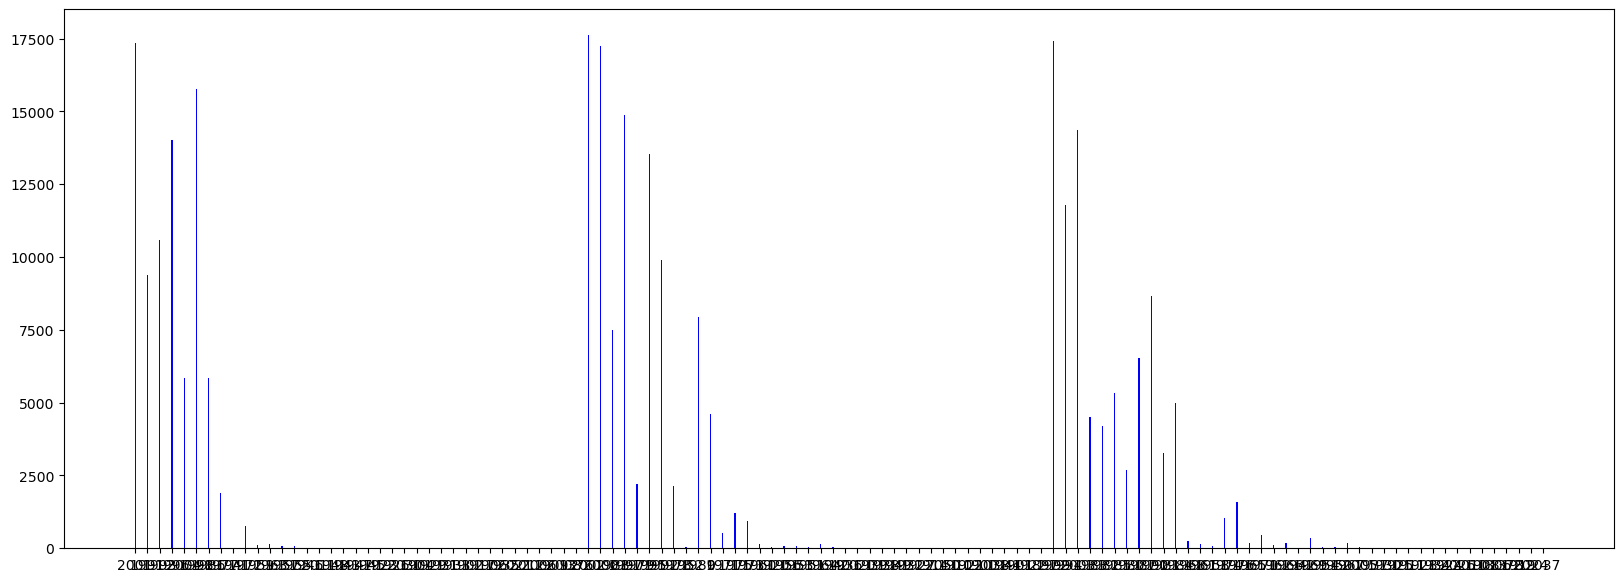

In [57]:
import matplotlib.pyplot as plt

all_result = result.take(result.count())

x = [i[0] for i in all_result]
y = [i[1] for i in all_result]
plt.figure(figsize=(20,7))
plt.bar(x, y, 0.1, color='blue')

# 5. Cho biết có bao nhiêu nhà xuất bản khác nhau trong data set.

In [58]:
number_of_publisher = data.groupBy(lambda b: b[4]).count()
print("Number of unique Publisher:", number_of_publisher)

Number of unique Publisher: 16807


# 6. Cho biết tác giả xuất bản nhiều sách nhất.

In [72]:
# Bai 7 - Case study 1
# Example cua thay: maxToan = rdd.map(lambda x: x['Toan'] if x.get('Toan')!=None else 0).max()
authors_with_total_books = data.groupBy(lambda b: b[2]).mapValues(len)
# Tim so loung lon nhat
max_book_count = authors_with_total_books.map(lambda x: int(x[1])).max()
# Lay nhung tac gia co so luong book lon nhat, neu co nhieu tac gia cung so luon
result6 = authors_with_total_books.filter(lambda x: x[1]==max_book_count)
print(result6.collect())

[('Agatha Christie', 632)]


# 7. Cho biết số cuốn sách của mỗi tác giả xuất bản với từng nhà xuất bản trong từng năm

In [79]:
# Concat string: b[2] (tac gia) +"-"+b[4] (nha xuat ban) +"-" + b[3] (name xuat ban)
delimiter = "$"
result7 = data.groupBy(lambda b: delimiter.join([b[2], b[4], b[3]])).mapValues(len)
result7.collect()

[('Mark P. O. Morford$Oxford University Press$2002', 1),
 ('Amy Tan$Putnam Pub Group$1991', 1),
 ('David Cordingly$Random House$1996', 1),
 ('Sheila Heti$House of Anansi Press$2004', 1),
 ('Loren D. Estleman$Brilliance Audio - Trade$1998', 1),
 ('John Grisham$Dell$1999', 1),
 ('Celia Brooks Brown$Ryland Peters &amp; Small Ltd$2001', 1),
 ('J. R. Parrish$Cypress House$2003', 1),
 ('Robynn Clairday$Scholastic$1999', 1),
 ('Kathleen Duey$Aladdin$1998', 3),
 ('C.S. Lewis$Scribner$1996', 8),
 ('Eleanor Cooney$Goldmann$2001', 1),
 ('Richard North Patterson$Goldmann$2000', 1),
 ('LAURA HILLENBRAND$Ballantine Books$2002', 1),
 ('Jane Austen$Bantam$1983', 2),
 ('Maeve Binchy$Dell$1997', 2),
 ('Tim Lahaye$Tyndale House Publishers$2000', 4),
 ('JOHN GRISHAM$Dell$1999', 1),
 ('M.D. Bernie S. Siegel$HarperCollins Publishers$1988', 1),
 ('Mark Helprin$Avon Books$1992', 1),
 ('Larry McMurtry$Pocket$1986', 2),
 ('SUZANNE FISHER STAPLES$Laurel Leaf$1991', 1),
 ('SUZANNE FISHER STAPLES$Laurel Leaf$1995'

# 8. Cho biết những nhà xuất bản mà mỗi tác giả chưa có sách xuất bản ở nhà xuất bản đó.

In [97]:
# Lay danh sach tat ca cac nha xuat ban
all_nha_xuat_ban = data.groupBy(lambda b: b[4]).keys().collect()
# Lay danh sach tat ca tac gia va nha xuat ban
# Define function lay unique cac nha xuat ban
def group_all_publisher_of_authors(v):
    r = []
    for d in v:
        if not d[4] in r:
            r.append(d[4])
    return r
all_authors_with_publisher = data.groupBy(lambda b: b[2]).mapValues(lambda v: group_all_publisher_of_authors(v))
result8 = all_authors_with_publisher.map(lambda x: [x[0], set(all_nha_xuat_ban) - set(x[1])])
print(result8.take(1))

[['Richard Bruce Wright', {'Distributed by Globe Pequot Press', 'Living Planet Press', 'Coppens &amp; Frenks. Publishers', 'Ravengate Pr', 'Publications International, Limited', "Bloomsbury Children's Books", 'Jordan Valley Heritage House', 'Kvsel-Verlag', 'Maypop Books', 'Bounty Books', 'Bullet Press', 'HealthMark Centers Inc', 'Innisfree Pr', 'Peel Productions', 'Harperperennial Library', 'Welcome Books', 'Doubleday Books', 'Scholars Press', 'A Fireside Book/Simon and Schuster', 'Petersons Guide Order Dept', 'Editions du Ch�?ªne', 'Dillon Press', 'Mountain House Pr', 'Chronicle Books (J)', 'Platform 5 Publishing', 'Hiperión', 'Scribner', 'Templegate Publishers', 'Melchior Publishing', 'Edward Arnold', 'C. Holloway Books', 'Collector Books', "distributed by St. Martin's Press", 'H.W. Sams', 'Seemann', 'Poudre Canyon Press', 'Birch Lane Press', "Hutchinson Children's Books", 'Jim Cook', 'Larousse Kingfisher+chambers', 'Cedel', 'Nepotist Books', 'W. Ludwig, M�?¼nchen', 'Middleton Press'